## オイラー法の実装のテスト

h*(dydx)は、時間かける速度、つまり位置

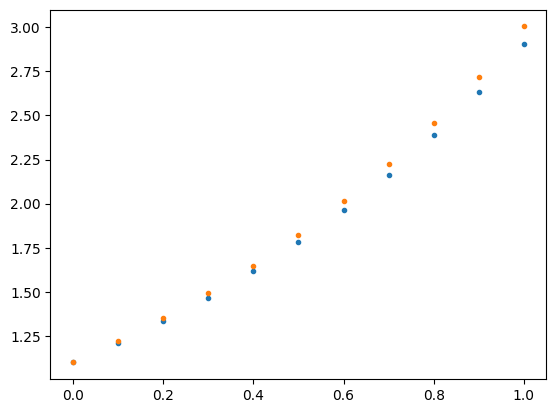

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# 微分
y = 1
X = []
Y = []
AnsY = []
x = 0
h = 0.1 #微小区間
dydx = np.exp(x) #ここが微分方程式 速度の関係式

while x < 1:
    dydx = np.exp(x) #速度
    X.append(x)#現在のxの値を保存
    y = y + h*(dydx) #次のyの値＝今のyの値＋微小量×傾き
    x += h #xの値を刻み幅分進める
    AnsY.append(np.exp(x))
    Y.append(y) #値を保存

plt.plot(X,Y,'.')
plt.plot(X,AnsY,'.')
plt.show()

# 7/2 人工衛星の位置プロット

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


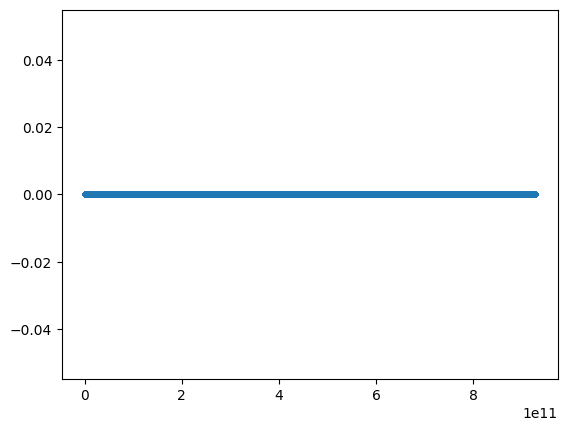

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# 各パラメータ
G = 6.67259e-11 #万有引力定数
m = 100 #衛生の質量
M = 5.9724e24 #地球の質量
R = 6378137 #ちきゅうの半径

#初期速度
# vx = 100
# vy = 50
# 後で書く{
#発射速度
v = 8000
#発射角度
launch_ang = 0
#よって、各成分の初期速度は
vx = v * np.cos(launch_ang)
vy = v * np.sin(launch_ang)


# xとyを保存するリストを作成
y0 = 0
x0 = 6378137
y = []
x = []
y.append(y0)
x.append(x0)
h = 0.1 #微小区間

for i in range(100000):
    # ① 飛翔体と地球の中心との距離「r」を求める（地球の中心が座標の原点とする）
    r = np.sqrt(np.sqrt(x[-1]**2) + np.sqrt(y[-1]**2))
    # ①-2 地球の中心を原点とした座標系での、飛翔体がうける万有引力の方向（Φ）
    fhy = np.arctan2(y[-1], x[-1])
    print(fhy)

    # ②万有引力は、公式より、（r以外は一定値）
    banyu_F = G*m*M/r**2
    # ③ファイがわかっているので、x成分とy成分に分解して求めると、ma = Fより、
    x_houkou_no_power = banyu_F*np.cos(fhy)
    y_houkou_no_power = banyu_F*np.sin(fhy)
    # これで万有引力のxy成分が求められた。

    # 得られた式は加速度の微分方程式なので、これをオイラー法を使って積分みたいな感じで速度を求めると、
    dvxdt = x_houkou_no_power/m
    dvydt = y_houkou_no_power/m
    vx = vx + h*dvxdt
    vy = vy + h*dvydt

    # これで速度がわかったので、更にオイラー法を使って積分的な計算をして位置を求めると(オイラー法は、求めたいもの＝一つ前の求めたいもの＋刻み幅*その微分値　こうすることで、傾き分だけ増やす計算)
    x.append(x[-1] + h*vx)
    y.append(y[-1] + h*vy)



# while x < 1:
#     dydx = np.exp(x) #速度
#     X.append(x)#現在のxの値を保存
#     y = y + h*(dydx) #次のyの値＝今のyの値＋微小量×傾き
#     x += h #xの値を刻み幅分進める
#     AnsY.append(np.exp(x))
#     Y.append(y) #値を保存

plt.plot(x,y,'.')
# plt.plot(x,AnsY,'.')
plt.show()